This code implements a quantum circuit optimization process to reduce the number of qubits in a given circuit while preserving its essential structure. Here's a brief explanation of the main components and their functions:

1. **Circuit to Graph Conversion**: The `circuit_to_graph` function converts a quantum circuit into a graph representation, where nodes represent qubits and edges represent two-qubit gates (specifically CZ gates)[1].

2. **Graph Optimization**: The `optimize_graph` function reduces the number of qubits in the circuit graph through several steps:
   - Removing isolated qubits
   - Merging qubits with similar gate sequences
   - Removing least significant qubits based on an importance metric[1]

3. **Qubit Merging**: The `merge_qubits` function combines two qubits in the graph, preserving their gate operations and connections[1].

4. **Circuit Synthesis**: The `synthesize_circuit` function reconstructs a quantum circuit from the optimized graph[1].

5. **Main Optimization Process**: The `optimize_quantum_circuit` function orchestrates the entire optimization process:
   - Reads an input QASM file
   - Converts the circuit to a graph
   - Optimizes the graph
   - Synthesizes an optimized circuit
   - Saves the optimized circuit to a new QASM file[1]

The code aims to reduce the number of qubits in the circuit to a target number (default 36) while maintaining the circuit's essential structure and operations. This optimization is particularly useful for running larger circuits on quantum hardware with limited qubit counts.

**The most probable Hidden String: 10100000000101110011001110101001111** 

In [1]:
from qiskit import QuantumCircuit

In [2]:
from qiskit import QuantumCircuit, Aer, execute
import networkx as nx
import matplotlib.pyplot as plt

In [5]:
qc = QuantumCircuit.from_qasm_file('/Users/shreyupadhyay/Downloads/circuit_2_42q.qasm')

In [ ]:
import pyzx as zx

circuit = zx.Circuit.load('/Users/shreyupadhyay/Downloads/circuit_2_42q.qasm')

# Convert to ZX-diagram (graph representation)
graph = circuit.to_graph()

print(graph)  
zx.draw(graph)

In [5]:
def convert_cluster_graph_to_qasm(cluster_graph): #Converts an optimized cluster graph back into a QuantumCircuit and then to QASM.
    num_qubits = cluster_graph.number_of_nodes()
    qc = QuantumCircuit(num_qubits)
    
    # Initialize all qubits in the |+⟩ state
    for q in range(num_qubits):
        qc.h(q)
    
    # Apply CZ gates based on the cluster graph edges
    for edge in cluster_graph.edges():
        qc.cz(edge[0], edge[1])
    
    return qc

def save_qasm(qc, file_path):
    qasm_str = qc.qasm()
    with open(file_path, 'w') as file:
        file.write(qasm_str)
    print(f"Quantum circuit saved to {file_path}")


optimized_graph_file = 'optimized_cluster_graph.adjlist'
output_qasm_file = '/Users/shreyupadhyay/Downloads/optimized_circuit_42q.qasm'
save_qasm(qc, output_qasm_file)

Quantum circuit saved to /Users/shreyupadhyay/Downloads/optimized_circuit_42q.qasm



Original Cluster Graph Nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
Total nodes
42
Original Cluster Graph Edges: [(0, 3), (0, 20), (0, 17), (0, 8), (0, 6), (1, 18), (1, 3), (1, 34), (2, 20), (2, 8), (2, 13), (2, 17), (3, 12), (3, 19), (3, 34), (4, 8), (4, 7), (4, 11), (5, 30), (5, 9), (6, 15), (7, 17), (8, 13), (8, 17), (9, 40), (9, 14), (9, 11), (10, 40), (10, 11), (11, 17), (11, 13), (11, 14), (12, 20), (14, 18), (15, 16), (15, 18), (15, 37), (16, 18), (16, 41), (18, 19), (18, 35), (18, 41), (19, 41), (19, 29), (20, 27), (20, 26), (21, 26), (21, 25), (21, 41), (21, 28), (22, 33), (22, 36), (22, 39), (23, 34), (24, 35), (24, 29), (24, 39), (25, 26), (25, 40), (26, 34), (26, 27), (27, 32), (27, 37), (30, 36), (31, 34), (32, 37), (32, 38), (32, 40), (34, 37), (35, 39), (36, 39), (37, 38), (38, 40)]


/var/folders/z3/5wtht_qx4ylbrx748h07ps780000gn/T/ipykernel_64513/2936023642.py:34: DeprecationWarning: The property ``qiskit.circuit.bit.Bit.index`` is deprecated as of qiskit-terra 0.17. It will be removed no earlier than 3 months after the release date. Instead, use :meth:`~qiskit.circuit.quantumcircuit.QuantumCircuit.find_bit` to find all the containing registers within a circuit and the index of the bit within the circuit.
  control = qargs[0].index
/var/folders/z3/5wtht_qx4ylbrx748h07ps780000gn/T/ipykernel_64513/2936023642.py:35: DeprecationWarning: The property ``qiskit.circuit.bit.Bit.index`` is deprecated as of qiskit-terra 0.17. It will be removed no earlier than 3 months after the release date. Instead, use :meth:`~qiskit.circuit.quantumcircuit.QuantumCircuit.find_bit` to find all the containing registers within a circuit and the index of the bit within the circuit.
  target = qargs[1].index


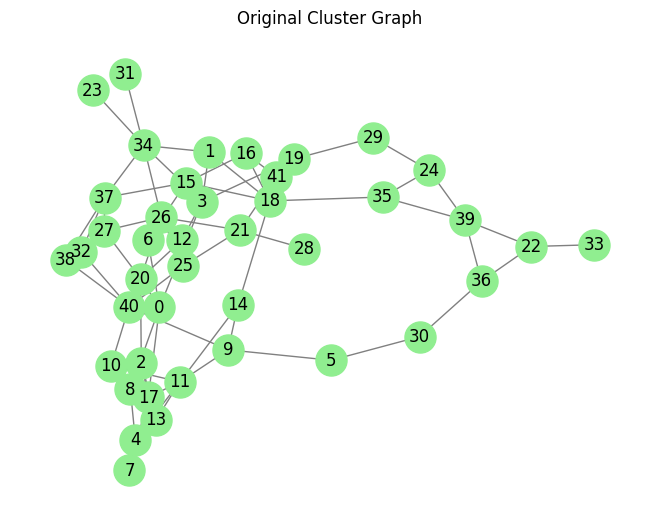

Optimized graph has 35 nodes and 75 edges.

Optimized Cluster Graph Nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
Total node after optimization
35
Optimized Cluster Graph Edges: [(0, 3), (0, 15), (0, 12), (0, 5), (0, 10), (1, 13), (1, 3), (1, 23), (1, 31), (1, 33), (2, 15), (2, 5), (2, 8), (2, 12), (3, 14), (3, 23), (3, 15), (3, 31), (3, 33), (4, 5), (4, 7), (4, 12), (5, 8), (5, 12), (6, 29), (6, 9), (6, 7), (6, 25), (7, 12), (7, 8), (7, 9), (7, 29), (9, 13), (10, 11), (10, 13), (10, 26), (11, 13), (11, 30), (13, 14), (13, 24), (13, 30), (14, 30), (14, 18), (15, 21), (15, 20), (16, 20), (16, 19), (16, 30), (17, 25), (17, 28), (18, 24), (18, 28), (19, 20), (19, 29), (19, 32), (20, 23), (20, 21), (20, 31), (20, 32), (20, 33), (21, 22), (21, 26), (22, 26), (22, 27), (22, 29), (23, 26), (24, 28), (25, 28), (25, 34), (26, 27), (26, 31), (26, 33), (27, 29), (28, 34), (30, 32)]


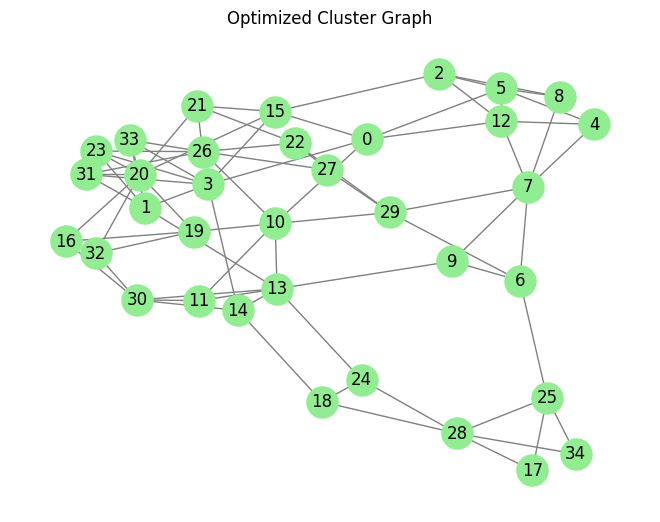

In [10]:
def optimize_cluster_graph(cluster_graph):

    optimized_graph = cluster_graph.copy()
    
    # Step 1: Remove isolated nodes
    isolated_nodes = list(nx.isolates(optimized_graph))
    optimized_graph.remove_nodes_from(isolated_nodes)
    
    # Step 2: Merge nodes with degree 2
    nodes_to_merge = [node for node, degree in optimized_graph.degree() if degree == 2]
    for node in nodes_to_merge:
        if optimized_graph.has_node(node):  # Check if node still exists
            neighbors = list(optimized_graph.neighbors(node))
            if len(neighbors) == 2:
                optimized_graph.add_edge(neighbors[0], neighbors[1])
                optimized_graph.remove_node(node)
    
    # Step 3: Merge leaf nodes with their parents
    while True:
        leaf_nodes = [node for node, degree in optimized_graph.degree() if degree == 1]
        if not leaf_nodes:
            break
        for leaf in leaf_nodes:
            parent = list(optimized_graph.neighbors(leaf))[0]
            optimized_graph.remove_node(leaf)
            for neighbor in list(optimized_graph.neighbors(parent)):
                if neighbor != leaf:
                    optimized_graph.add_edge(leaf, neighbor)
    
    # Step 4: Merge nodes in linear chains
    linear_chains = []
    for node in optimized_graph.nodes():
        if optimized_graph.degree[node] == 2:
            neighbors = list(optimized_graph.neighbors(node))
            chain = [neighbors[0], node, neighbors[1]]
            while optimized_graph.degree[chain[0]] == 2:
                prev_node = [n for n in optimized_graph.neighbors(chain[0]) if n != chain[1]][0]
                chain.insert(0, prev_node)
            while optimized_graph.degree[chain[-1]] == 2:
                next_node = [n for n in optimized_graph.neighbors(chain[-1]) if n != chain[-2]][0]
                chain.append(next_node)
            if len(chain) > 3:
                linear_chains.append(chain)
    
    for chain in linear_chains:
        if len(chain) > 2:
            optimized_graph.add_edge(chain[0], chain[-1])
            optimized_graph.remove_nodes_from(chain[1:-1])
    
    # Step 5: Re-label nodes to ensure consecutive numbering
    mapping = {node: idx for idx, node in enumerate(optimized_graph.nodes())}
    optimized_graph = nx.relabel_nodes(optimized_graph, mapping)
    
    print(f"Optimized graph has {optimized_graph.number_of_nodes()} nodes and {optimized_graph.number_of_edges()} edges.")
    return optimized_graph


# Convert to cluster graph
cluster_graph = convert_to_cluster_graph(qc)
print("\nOriginal Cluster Graph Nodes:", cluster_graph.nodes())
print("Total nodes")
print(len(cluster_graph.nodes()))
print("Original Cluster Graph Edges:", cluster_graph.edges())

# Visualize the original cluster graph
visualize_cluster_graph(cluster_graph, title="Original Cluster Graph")

# Optimize the cluster graph
optimized_graph = optimize_cluster_graph(cluster_graph)

print("\nOptimized Cluster Graph Nodes:", optimized_graph.nodes())
print("Total node after optimization")
print(len(optimized_graph.nodes()))
print("Optimized Cluster Graph Edges:", optimized_graph.edges())

# Visualize the optimized cluster graph
visualize_cluster_graph(optimized_graph, title="Optimized Cluster Graph")



In [69]:
print(qc_trail_42_q.count_ops())

OrderedDict({'measure': 42, 'unitary': 1, 'unitary_5940142560': 1, 'unitary_5940140880': 1, 'unitary_5940137808': 1, 'unitary_5940204640': 1, 'unitary_5940201712': 1, 'unitary_5940203536': 1, 'unitary_5940211360': 1, 'unitary_5940213568': 1, 'unitary_5940279680': 1, 'unitary_5940266576': 1, 'unitary_5940266240': 1, 'unitary_5940266192': 1, 'unitary_5940265184': 1, 'unitary_5940266528': 1, 'unitary_5940265760': 1, 'unitary_5940265232': 1, 'unitary_5940267344': 1, 'unitary_5940265040': 1, 'unitary_5940266288': 1, 'unitary_5940267440': 1, 'unitary_5940268496': 1, 'unitary_5940269312': 1, 'unitary_5940270080': 1, 'unitary_5940270752': 1, 'unitary_5940271568': 1, 'unitary_5940272384': 1, 'unitary_5940273200': 1, 'unitary_5940280064': 1, 'unitary_5940281024': 1, 'unitary_5940299008': 1, 'unitary_5940298480': 1, 'unitary_5940298960': 1, 'unitary_5940298144': 1, 'unitary_5940297904': 1, 'unitary_5940300880': 1, 'unitary_5940312064': 1, 'unitary_5940298192': 1, 'unitary_5940299776': 1, 'unitary

In [35]:


def circuit_to_graph(qc):
    graph = nx.Graph()
    for qubit in qc.qubits:
        graph.add_node(qubit.index, gates=[], importance=0)
    
    for instruction in qc.data:
        gate = instruction[0]
        qubits = [q.index for q in instruction[1]]
        
        if isinstance(gate, CZGate) and len(qubits) == 2:
            graph.add_edge(qubits[0], qubits[1], gate=gate)
            graph.nodes[qubits[0]]['importance'] += 1
            graph.nodes[qubits[1]]['importance'] += 1
        elif len(qubits) == 1:
            graph.nodes[qubits[0]]['gates'].append(gate)
            graph.nodes[qubits[0]]['importance'] += 0.5
    
    return graph

def optimize_graph(graph, target_qubits=36):
    optimized = graph.copy()
    
    # Step 1: Remove isolated qubits
    isolated_qubits = list(nx.isolates(optimized))
    optimized.remove_nodes_from(isolated_qubits)
    
    # Step 2: Merge qubits with similar gate sequences
    qubit_sequences = {}
    for node, data in optimized.nodes(data=True):
        gate_sequence = tuple(gate.name for gate in data['gates'])
        if gate_sequence in qubit_sequences:
            qubit_sequences[gate_sequence].append(node)
        else:
            qubit_sequences[gate_sequence] = [node]
    
    for sequence, qubits in qubit_sequences.items():
        if len(qubits) > 1:
            primary_qubit = min(qubits)
            for qubit in qubits[1:]:
                if not optimized.has_edge(primary_qubit, qubit):
                    optimized = merge_qubits(optimized, primary_qubit, qubit)
    
    # Step 3: Remove least significant qubits
    while optimized.number_of_nodes() > target_qubits:
        least_significant = min(optimized.nodes, key=lambda x: optimized.nodes[x]['importance'])
        optimized.remove_node(least_significant)
    
    # Renumber the remaining qubits
    mapping = {old: new for new, old in enumerate(sorted(optimized.nodes))}
    optimized = nx.relabel_nodes(optimized, mapping)
    
    return optimized

def merge_qubits(graph, qubit1, qubit2):

    graph.nodes[qubit1]['gates'].extend(graph.nodes[qubit2]['gates'])
    graph.nodes[qubit1]['importance'] += graph.nodes[qubit2]['importance']
    

    for neighbor in list(graph.neighbors(qubit2)):
        if neighbor != qubit1:
            graph.add_edge(qubit1, neighbor)

    graph.remove_node(qubit2)
    
    return graph

def synthesize_circuit(graph):
    num_qubits = max(graph.nodes()) + 1
    qr = QuantumRegister(num_qubits, 'q')
    
    measurements_present = any(isinstance(gate, Measure) for node in graph.nodes for gate in graph.nodes[node]['gates'])
    
    if measurements_present:
        cr = ClassicalRegister(num_qubits, 'c')
        qc = QuantumCircuit(qr, cr)
    else:
        qc = QuantumCircuit(qr)
    
    for node, data in graph.nodes(data=True):
        for gate in data['gates']:
            if isinstance(gate, Measure):
                if measurements_present:
                    qc.measure(qr[node], cr[node])
            elif isinstance(gate, Operator):
                qc.unitary(gate, [qr[node]], label=f"U_{node}")
            else:
                qc.append(gate, [qr[node]])
    
    for edge in graph.edges():
        qc.cz(qr[edge[0]], qr[edge[1]])
    
    return qc

def optimize_quantum_circuit(input_qasm_path, output_qasm_path, target_qubits=36):
    # Read the input QASM file
    qc = QuantumCircuit.from_qasm_file(input_qasm_path)
    
    # Convert circuit to graph
    graph = circuit_to_graph(qc)
    
    # Optimize the graph
    optimized_graph = optimize_graph(graph, target_qubits)
    
    # Synthesize the optimized circuit
    optimized_qc = synthesize_circuit(optimized_graph)
    
    # Save to QASM file
    optimized_qc.qasm(filename=output_qasm_path)
    
    print(f"Optimized QASM file saved to {output_qasm_path}")
    print(f"Original number of qubits: {qc.num_qubits}")
    print(f"Optimized number of qubits: {optimized_qc.num_qubits}")

# Usage
input_qasm_path = "/Users/shreyupadhyay/Downloads/circuit_2_42q.qasm"
output_qasm_path = "/Users/shreyupadhyay/Downloads/optimized_circuit_2_42q.qasm"
optimize_quantum_circuit(input_qasm_path, output_qasm_path, target_qubits=35)

Optimized QASM file saved to /Users/shreyupadhyay/Downloads/optimized_circuit_2_42q.qasm
Original number of qubits: 42
Optimized number of qubits: 35


/var/folders/z3/5wtht_qx4ylbrx748h07ps780000gn/T/ipykernel_64513/2968317897.py:13: DeprecationWarning: The property ``qiskit.circuit.bit.Bit.index`` is deprecated as of qiskit-terra 0.17. It will be removed no earlier than 3 months after the release date. Instead, use :meth:`~qiskit.circuit.quantumcircuit.QuantumCircuit.find_bit` to find all the containing registers within a circuit and the index of the bit within the circuit.
  graph.add_node(qubit.index, gates=[], importance=0)
/var/folders/z3/5wtht_qx4ylbrx748h07ps780000gn/T/ipykernel_64513/2968317897.py:17: DeprecationWarning: The property ``qiskit.circuit.bit.Bit.index`` is deprecated as of qiskit-terra 0.17. It will be removed no earlier than 3 months after the release date. Instead, use :meth:`~qiskit.circuit.quantumcircuit.QuantumCircuit.find_bit` to find all the containing registers within a circuit and the index of the bit within the circuit.
  qubits = [q.index for q in instruction[1]]


In [ ]:
qc_2 = QuantumCircuit.from_qasm_file('/Users/shreyupadhyay/Downloads/optimized_circuit_2_42q.qasm')
qc_2.draw('mpl')

Since BlueQubit doesnot allow for mid circuit measurements, I remove all mid circuit mesurements and push them back at the end

In [49]:
def remove_mid_circuit_measurements(qasm_file_path, output_file_path):
    with open(qasm_file_path, 'r') as file:
        lines = file.readlines()

    # Separate gate operations and measurements
    gate_instructions = []
    measurement_instructions = []

    for line in lines:
        stripped_line = line.strip()

        # Identify measurement lines (e.g., measure q[0] -> c[0];)
        if stripped_line.startswith("measure"):
            measurement_instructions.append(stripped_line)
        elif not stripped_line.startswith("//") and stripped_line:
            # Keep all other non-empty lines (except comments)
            gate_instructions.append(stripped_line)

    # Append all measurements at the end of the circuit
    optimized_qasm = gate_instructions + measurement_instructions

    # Write the modified QASM to a new file
    with open(output_file_path, 'w') as file:
        for line in optimized_qasm:
            file.write(f"{line}\n")

    print(f"Modified QASM saved to: {output_file_path}")

input_qasm_path = "/Users/shreyupadhyay/Downloads/circuit_2_42q.qasm"
output_qasm_path = "/Users/shreyupadhyay/Downloads/2_optimized_circuit_2_42q.qasm"
optimize_quantum_circuit(input_qasm_path, output_qasm_path, target_qubits=35)



Optimized QASM file saved to /Users/shreyupadhyay/Downloads/2_optimized_circuit_2_42q.qasm
Original number of qubits: 42
Optimized number of qubits: 35


/var/folders/z3/5wtht_qx4ylbrx748h07ps780000gn/T/ipykernel_64513/1366196047.py:12: DeprecationWarning: The property ``qiskit.circuit.bit.Bit.index`` is deprecated as of qiskit-terra 0.17. It will be removed no earlier than 3 months after the release date. Instead, use :meth:`~qiskit.circuit.quantumcircuit.QuantumCircuit.find_bit` to find all the containing registers within a circuit and the index of the bit within the circuit.
  graph.add_node(qubit.index, gates=[], importance=0)
/var/folders/z3/5wtht_qx4ylbrx748h07ps780000gn/T/ipykernel_64513/1366196047.py:16: DeprecationWarning: The property ``qiskit.circuit.bit.Bit.index`` is deprecated as of qiskit-terra 0.17. It will be removed no earlier than 3 months after the release date. Instead, use :meth:`~qiskit.circuit.quantumcircuit.QuantumCircuit.find_bit` to find all the containing registers within a circuit and the index of the bit within the circuit.
  qubits = [q.index for q in instruction[1]]


In [51]:
def remove_mid_circuit_measurements(qasm_file_path, output_file_path):
    with open(qasm_file_path, 'r') as file:
        lines = file.readlines()

    # Separate gate operations and measurements
    gate_instructions = []
    measurement_instructions = []

    for line in lines:
        stripped_line = line.strip()

        # Identify measurement lines (e.g., measure q[0] -> c[0];)
        if stripped_line.startswith("measure"):
            measurement_instructions.append(stripped_line)
        elif not stripped_line.startswith("//") and stripped_line:
            # Keep all other non-empty lines (except comments)
            gate_instructions.append(stripped_line)

    # Append all measurements at the end of the circuit
    optimized_qasm = gate_instructions + measurement_instructions

    # Write the modified QASM to a new file
    with open(output_file_path, 'w') as file:
        for line in optimized_qasm:
            file.write(f"{line}\n")

    print(f"Modified QASM saved to: {output_file_path}")

# Usage
input_qasm_path = "/Users/shreyupadhyay/Downloads/optimized_circuit_2_42q.qasm"
output_qasm_path = "/Users/shreyupadhyay/Downloads/final_optimized_circuit_2_42q.qasm"

remove_mid_circuit_measurements(input_qasm_path, output_qasm_path)


Modified QASM saved to: /Users/shreyupadhyay/Downloads/final_optimized_circuit_2_42q.qasm


In [ ]:
qc_2_opt_trail_2 = QuantumCircuit.from_qasm_file('/Users/shreyupadhyay/Downloads/final_optimized_circuit_2_42q.qasm')
qc_2_opt_trail_2.draw('mpl')

#with removed mid circuit measurements

In [62]:
import bluequbit

bq = bluequbit.init("ylZ4iNr1hywy8SZ0jPeqLku3p3UerJp3")
bq.estimate(qc_2_opt_trail_2, device='gpu')
result = bq.run(qc_2_opt_trail_2, device='gpu')
print(result.get_counts())

BQ-PYTHON-SDK - WARNING - Beta version 0.8.3b1 of BlueQubit Python SDK is being used.


BQJobNotCompleteError: Job U6nWf8mxMLJ4hTew finished with status: TERMINATED. Could not bring up big machines for this circuit now. Please try again later.

In [55]:
max_counts = max(result.get_counts(), key=result.get_counts().get)
print(f"Most probable state: {max_counts} with probability: {result.get_counts()[max_counts]} ")

Most probable state: 10100000000101110011001110101001111 with probability: 9.015441173687577e-05 


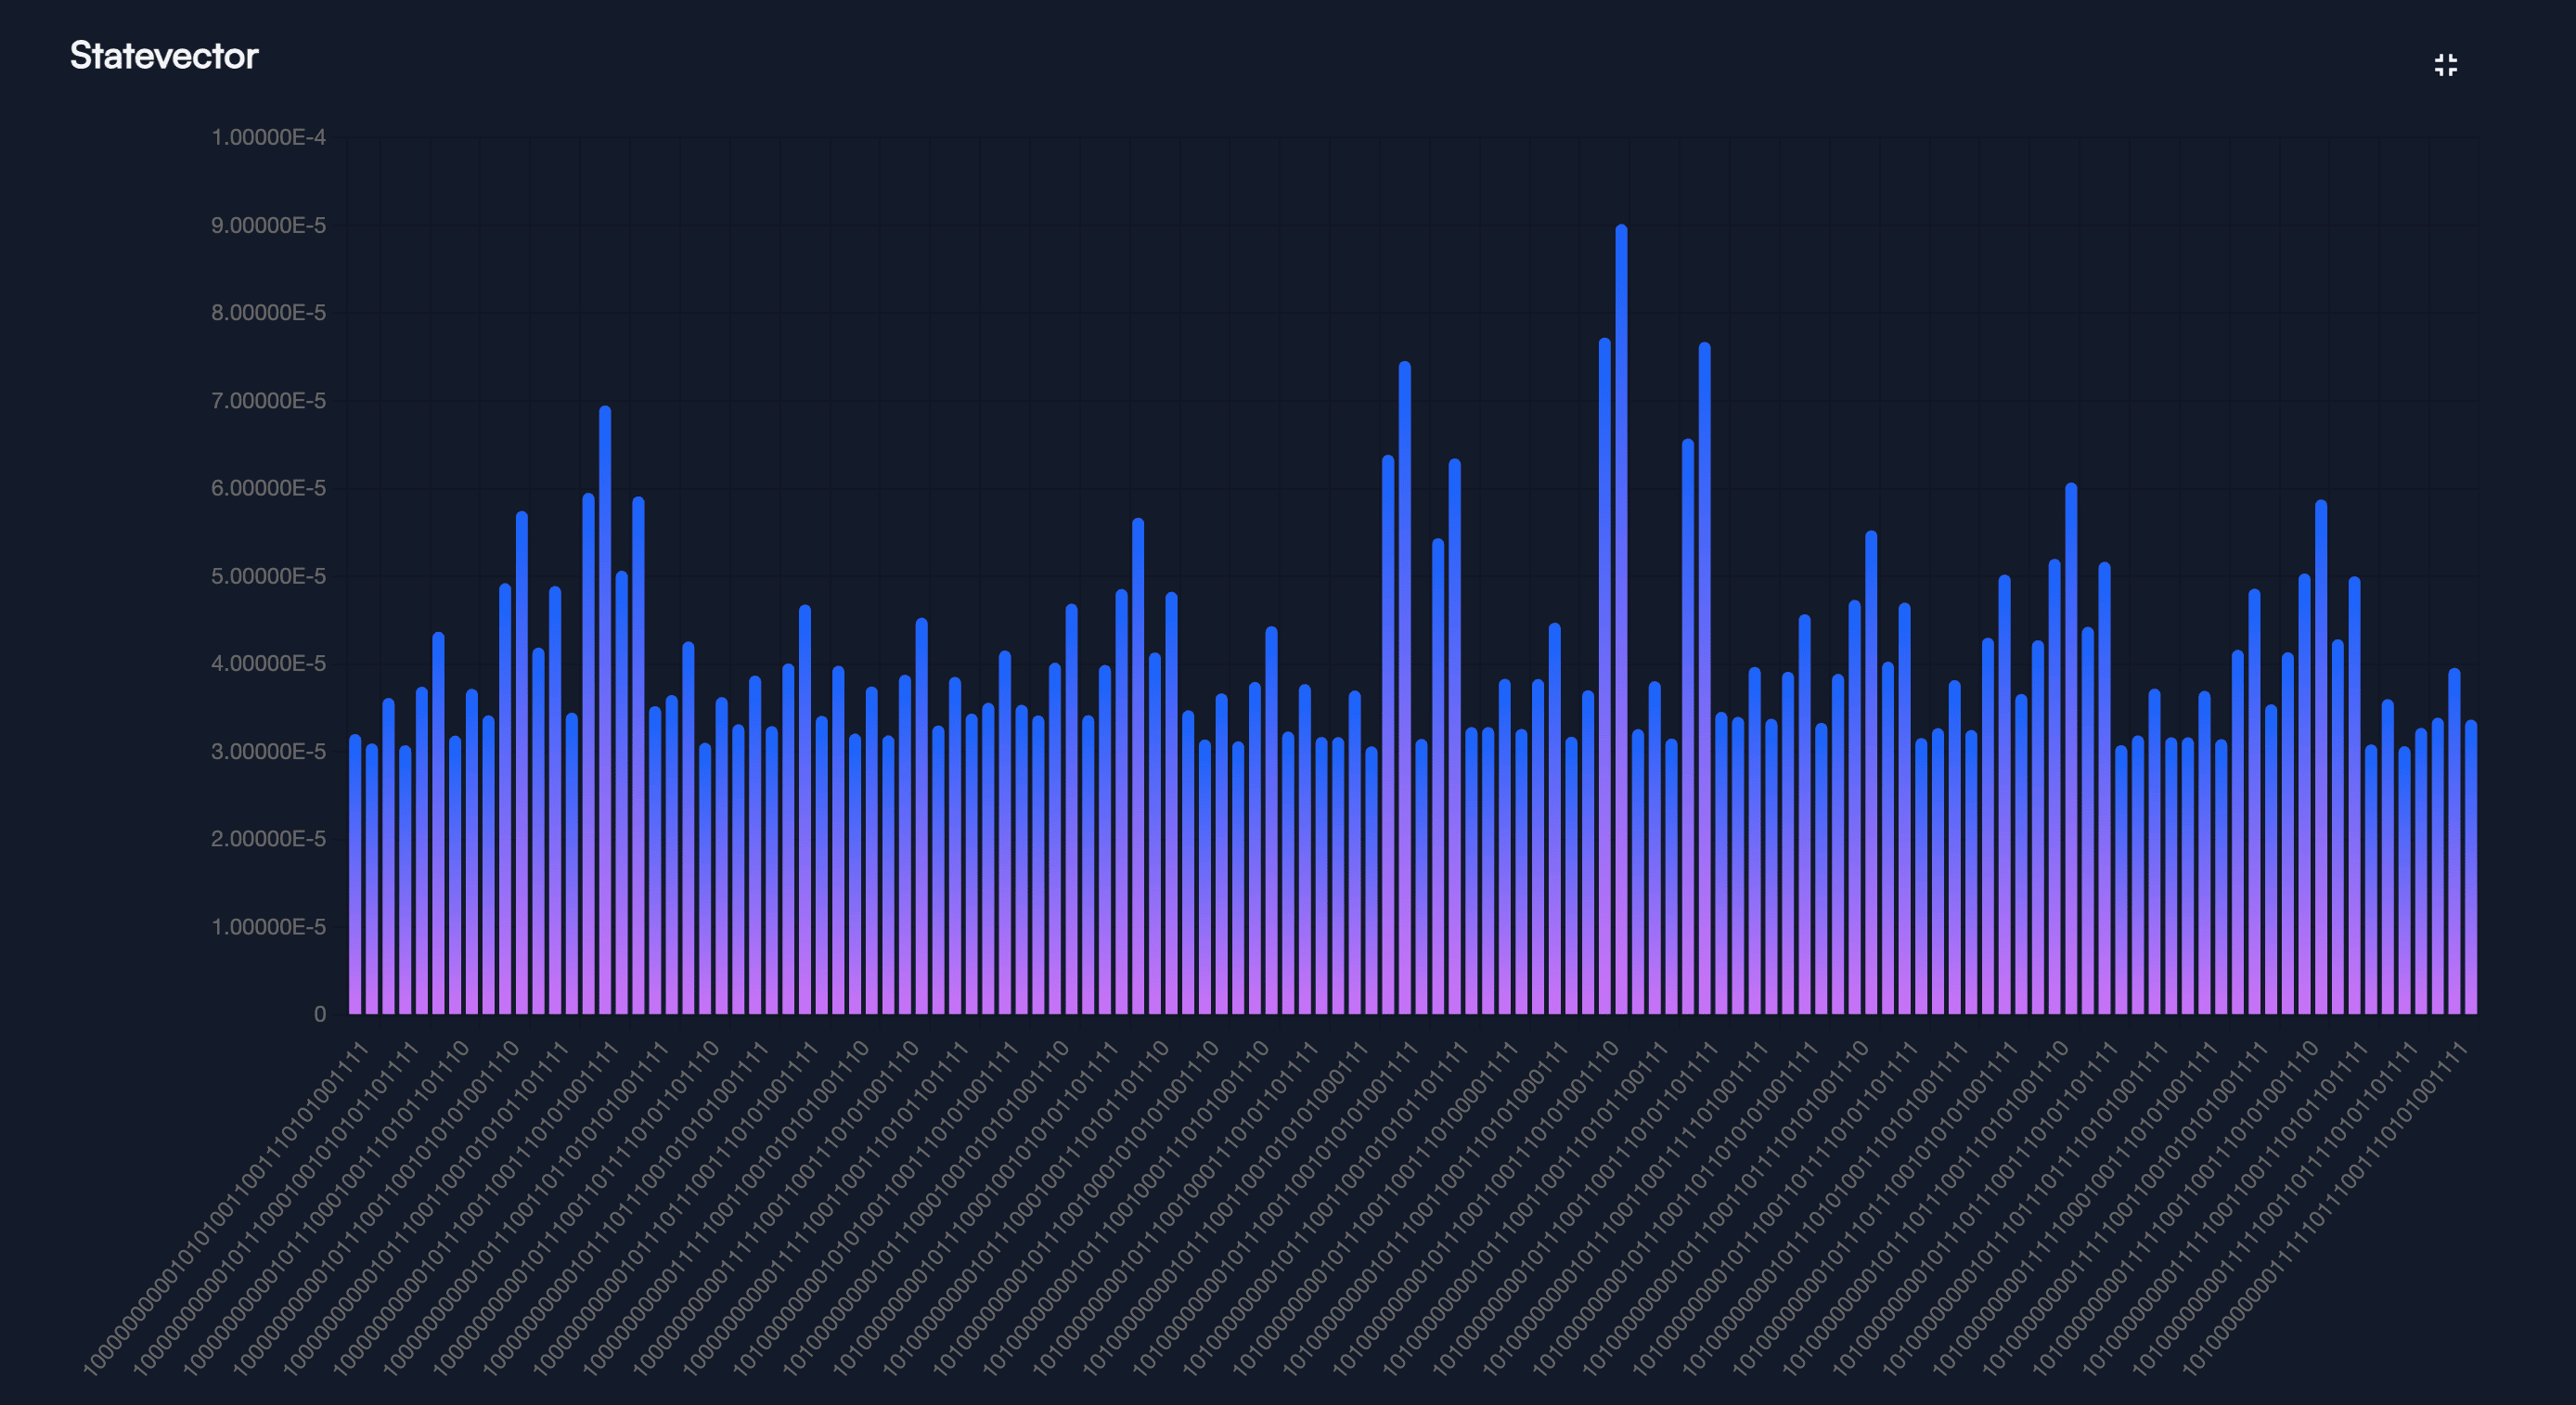

## Extra Attempts to solve the problem with cirq

In [ ]:
import cirq
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from cirq.contrib.qasm_import import circuit_from_qasm
cirq_circuit = circuit_from_qasm_file('/Users/shreyupadhyay/Downloads/circuit_2_42q.qasm')
def circuit_to_edge_graph(circuit):
    """
    Convert a Cirq quantum circuit to an edge graph.
    """
    G = nx.Graph()
    for moment in circuit:
        for op in moment:
            if len(op.qubits) > 1:  # Only consider multi-qubit gates
                for q1, q2 in zip(op.qubits[:-1], op.qubits[1:]):
                    if G.has_edge(q1, q2):
                        G[q1][q2]['weight'] += 1
                    else:
                        G.add_edge(q1, q2, weight=1)
    return G

def optimize_graph_edges(G, threshold):
    """
    Optimize graph edges using a thresholding approach.
    """
    optimized_G = nx.Graph()
    for (u, v, data) in G.edges(data=True):
        if data['weight'] > threshold:
            optimized_G.add_edge(u, v, weight=data['weight'])
    return optimized_G

def visualize_graph(G, title):
    """
    Visualize the graph.
    """
    pos = nx.spring_layout(G)
    plt.figure(figsize=(10, 8))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
    
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    
    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Convert the circuit to an edge graph
original_graph = circuit_to_edge_graph(cirq_circuit)

print("Original Graph Edges:")
#print(original_graph.edges(data=True))

# Visualize the original graph
visualize_graph(original_graph, "Original Circuit Graph")

# Optimize the graph edges
threshold = 2 # Adjust this value to control the optimization
optimized_graph = optimize_graph_edges(original_graph, threshold)
def ensure_connected_graph(G):
    """
    Ensure the graph remains connected using a Minimum Spanning Tree (MST).
    """
    mst = nx.minimum_spanning_tree(G)
    return mst

# Convert the circuit to an edge graph
original_graph = circuit_to_edge_graph(cirq_circuit)

# Optimize and ensure connectivity with MST
optimized_graph = ensure_connected_graph(original_graph)

# Visualize the optimized graph
visualize_graph(optimized_graph, "Optimized Circuit Graph with MST")
# Calculate the reduction in edges
original_edge_count = original_graph.number_of_edges()
optimized_edge_count = optimized_graph.number_of_edges()
reduction_percentage = (original_edge_count - optimized_edge_count) / original_edge_count * 100

print(f"\nEdge Reduction: {reduction_percentage:.2f}%")

In [ ]:
import networkx as nx

# Assuming optimized_graph is your NetworkX graph
# Example: optimized_graph = nx.Graph([(0, 1), (1, 2), (2, 3)])

def graph_to_qasm(optimized_graph):
    # Initialize QASM string
    qasm_code = []

    # QASM Header
    qasm_code.append('OPENQASM 2.0;')
    qasm_code.append('include "qelib1.inc";')

    # Define qubits
    qubits = list(optimized_graph.nodes)
    qasm_code.append(f'qreg q[{len(qubits)}];')

    # Create CNOT gates based on edges
    for u, v in optimized_graph.edges():
        qasm_code.append(f'cx q[{qubits.index(u)}], q[{qubits.index(v)}];')

    return '\n'.join(qasm_code)

def save_qasm_to_file(qasm_code, filename):
    with open(filename, 'w') as file:
        file.write(qasm_code)

# Convert the graph to QASM
qasm_string = graph_to_qasm(optimized_graph)

# Save the QASM to a file
qasm_filename = '/Users/shreyupadhyay/Downloads/q_files/optimized_circuit.qasm'
save_qasm_to_file(qasm_string, qasm_filename)

print(f"QASM code saved to {qasm_filename}")

QASM code saved to /Users/shreyupadhyay/Downloads/q_files/optimized_circuit.qasm


In [ ]:
import cirq
import networkx as nx
from itertools import combinations

def create_subcircuits(graph, max_qubits):
  
    subcircuits = []
    nodes = list(graph.nodes)
    
    # Simple greedy partitioning
    while nodes:
        subgraph_nodes = nodes[:max_qubits]
        subgraph = graph.subgraph(subgraph_nodes)
        subcircuits.append(subgraph)
        nodes = nodes[max_qubits:]
    
    return subcircuits

def optimize_circuit(circuit, max_qubits=30):
    # Convert circuit to graph
    G = nx.Graph()
    for moment in circuit:
        for op in moment:
            if len(op.qubits) > 1:
                for q1, q2 in combinations(op.qubits, 2):
                    G.add_edge(q1, q2)
    
    # Partition graph into subcircuits with fewer qubits
    subgraphs = create_subcircuits(G, max_qubits)
    
    # Convert subgraphs back to circuits
    optimized_circuits = []
    for sg in subgraphs:
        subcircuit = cirq.Circuit()
        for edge in sg.edges:
            q1, q2 = edge
            subcircuit.append(cirq.CNOT(q1, q2))
        optimized_circuits.append(subcircuit)
    
    return optimized_circuits

qubits = [cirq.LineQubit(i) for i in range(42)]
circuit = cirq_circuit

optimized_circuits = optimize_circuit(circuit)

for i, oc in enumerate(optimized_circuits):
    print(f"Subcircuit {i}:")
    print(oc)

In [ ]:
from qiskit import QuantumCircuit, Aer, transpile, execute

simulator = Aer.get_backend('qasm_simulator')

compiled_circuit = transpile(qc, simulator)

job = execute(compiled_circuit, simulator, shots=1024)  
result = job.result()

counts = result.get_counts(qc)

print("Measurement Results (Counts):", counts)


Measurement Results (Counts): {'101001001011101111110': 1, '101000001011001011001': 1, '101000101011011101010': 1, '100000001010111111011': 1, '001000011110101111011': 1, '001000111111001011101': 1, '101000101110011001010': 1, '101000101010001101011': 1, '101000111010111111011': 1, '001000000011101011010': 1, '001001111111011001011': 1, '111100001110001110101': 1, '101000101111001101011': 1, '001001011110111011011': 1, '011000010110111100011': 1, '101000001011111101111': 1, '000000111010101111011': 1, '001000111111001011110': 1, '100000101011101111010': 1, '011000001110001111011': 1, '101100000110001111101': 1, '101001101010001111011': 1, '001100010010111101010': 1, '000000011111101101011': 1, '001000000110111100110': 1, '001000001011001111110': 1, '000000111110111001111': 1, '001100000011101010010': 1, '001000010010111101110': 1, '101000111111011001001': 1, '000000111110111101001': 1, '001001011111011101111': 1, '001001011010011111111': 1, '101000110010011110010': 1, '1000100111111111

In [ ]:
print(max(counts, key=counts.get))

101000001110001111011


In [ ]:
import cirq
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
from qiskit.quantum_info import Operator
from qiskit.circuit.library import CZGate
from qiskit.circuit import Measure
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import bluequbit as bq

def calculate_expectation_value(circuit):
    expectation = bq.run(circuit, device='gpu') 
    return expectation

def optimize_graph(graph, target_qubits=36):
    #print_graph(graph, "Original Graph")
    plot_graph(graph, "Original Graph")
    
    optimized = SimpleGraph()
    for node, data in graph.nodes.items():
        optimized.add_node(node)
        optimized.nodes[node] = data.copy()
    for node, neighbors in graph.edges.items():
        for neighbor in neighbors:
            optimized.add_edge(node, neighbor)
    
    # Step 1: Remove isolated qubits
    isolated_qubits = [node for node in optimized.nodes if not optimized.neighbors(node)]
    for qubit in isolated_qubits:
        optimized.remove_node(qubit)
    
    # Step 2: Merge qubits with similar gate sequences
    qubit_sequences = {}
    for node in optimized.nodes:
        gate_sequence = tuple(gate.name for gate in optimized.nodes[node]['gates'])
        if gate_sequence in qubit_sequences:
            qubit_sequences[gate_sequence].append(node)
        else:
            qubit_sequences[gate_sequence] = [node]
    
    for sequence, qubits in qubit_sequences.items():
        if len(qubits) > 1:
            primary_qubit = min(qubits)
            for qubit in qubits[1:]:
                if qubit not in optimized.neighbors(primary_qubit):
                    optimized = merge_qubits(optimized, primary_qubit, qubit)
    
    # Step 3: Remove least significant qubits
    while len(optimized.nodes) > target_qubits:
        least_significant = min(optimized.nodes, key=lambda x: optimized.nodes[x]['importance'])
        optimized.remove_node(least_significant)
    
    # Renumber the remaining qubits
    old_to_new = {old: cirq.LineQubit(new) for new, old in enumerate(sorted(optimized.nodes, key=lambda x: x.x))}
    final_optimized = SimpleGraph()
    for old_node, new_node in old_to_new.items():
        final_optimized.add_node(new_node)
        final_optimized.nodes[new_node] = optimized.nodes[old_node]
    
    for old_node in optimized.edges:
        for old_neighbor in optimized.edges[old_node]:
            if old_node in old_to_new and old_neighbor in old_to_new:
                final_optimized.add_edge(old_to_new[old_node], old_to_new[old_neighbor])
    
    #print_graph(final_optimized, "Optimized Graph")
    plot_graph(final_optimized, "Optimized Graph")
    
    return final_optimized

def find_max_expectation_state(circuit, num_qubits, num_iterations=100):
    max_expectation = float('-inf')
    max_state = None
    
    for _ in range(num_iterations):
        # Generate a random initial state
        initial_state = np.random.rand(2**num_qubits) + 1j * np.random.rand(2**num_qubits)
        initial_state /= np.linalg.norm(initial_state)
        
        # Prepare the circuit with the initial state
        qr = QuantumRegister(num_qubits)
        cr = ClassicalRegister(num_qubits)
        qc = QuantumCircuit(qr, cr)
        qc.initialize(initial_state, qr)
        
        # Append the optimized circuit
        qc = qc.compose(circuit)
        
        # Measure all qubits
        qc.measure(qr, cr)
        
        # Calculate the expectation value
        expectation = calculate_expectation_value(qc)
        
        if expectation > max_expectation:
            max_expectation = expectation
            max_state = initial_state
    
    return max_state, max_expectation

def optimize_quantum_circuit(input_qasm_path, output_qasm_path, target_qubits=35):
    # Read the input QASM file
    qc = QuantumCircuit.from_qasm_file(input_qasm_path)
    
    # Convert circuit to graph
    graph = circuit_to_graph(qc)
    
    # Optimize the graph
    optimized_graph = optimize_graph(graph, target_qubits)
    
    # Synthesize the optimized circuit
    optimized_qc = synthesize_circuit(optimized_graph)
    
    # Find the state with maximum expectation value
    num_qubits = optimized_qc.num_qubits
    max_state, max_expectation = find_max_expectation_state(optimized_qc, num_qubits)
    
    # Save to QASM file
    optimized_qc.qasm(filename=output_qasm_path)
    
    print(f"Optimized QASM file saved to {output_qasm_path}")
    print(f"Original number of qubits: {qc.num_qubits}")
    print(f"Optimized number of qubits: {optimized_qc.num_qubits}")
    print(f"Maximum expectation value: {max_expectation}")
    print(f"State with maximum expectation value: {max_state}")

# Usage
input_qasm_path = "/Users/shreyupadhyay/Downloads/circuit_2_42q.qasm"
output_qasm_path = "/Users/shreyupadhyay/Downloads/2_optimized_circuit_2_42q.qasm"
optimize_quantum_circuit(input_qasm_path, output_qasm_path, target_qubits=35)